# Machine Learning 2018.3
> - **Lista 4**
- **Lucas Lopes Felipe** - *PPGI*
- **Turma**: *CPS-863 / COS-623 / MAB-608*
- **Professores**: Edmundo, Daniel S. Menascé e Rosa Leão

## Base de Dados

> As características dos dados fornecidos são: **idade do paciente** (*anos*), **peso** (*kg*), **carga final** (*watts*) e **VO$_2$ máximo** (*mL/Kg/min*). Fornecemos um ($1$) arquivo com dados de $1.172$ pacientes coletados pelo Professor e sua equipe: *Dados-medicos.csv*.

In [9]:
import pandas as pd
df = pd.read_csv('./Dados-medicos.txt', sep=" ")
df.columns = ['Idade', 'Peso', 'Carga', 'VO2']
df.head()

,Idade,Peso,Carga,VO2
0,49,79.1,250.0,49.051833
1,30,52.4,177.0,41.603053
2,56,65.8,140.0,32.674772
3,29,78.0,400.0,59.102564
4,49,69.2,242.0,48.410405


## Questão 5
> O objetivo desta questão é construir um modelo não supervisionado, usando uma mistura de Gaussianas, e estudar o algoritmo EM (Expectation Maximization).

>Suponha que a variável idade **não** é observada, diferentemente do problema anterior, e você quer verificar se os agrupamentos encontrados formam faixas etárias. Neste caso, suponha que o número de classes seja igual ao número de faixas etárias, e você **não sabe** nada sobre o número de faixas. Note que você **não pode usar os dados de idade fornecidos**. Portanto, é parte do trabalho a escolha do número de classes a ser usado. (Sugestão: experimente com 2, 3, etc.)

In [11]:
train = df.drop(columns='Idade')
train.head()

,Peso,Carga,VO2
0,79.1,250.0,49.051833
1,52.4,177.0,41.603053
2,65.8,140.0,32.674772
3,78.0,400.0,59.102564
4,69.2,242.0,48.410405


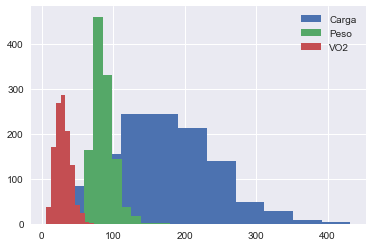

In [41]:
import matplotlib.pyplot as plt # Biblioteca para Plot
import seaborn as sns # Biblioteca de Visualização/Estilo
plt.style.use('seaborn') # Estilo de gráfico
%matplotlib inline

plt.hist(train['Carga'], label='Carga')
plt.hist(train['Peso'], label='Peso')
plt.hist(train['VO2'], label='VO2')
plt.legend()

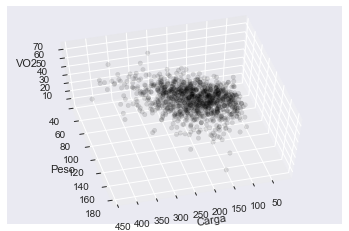

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train['Carga'], train['Peso'], train['VO2'], alpha=.12, c='k')

ax.set_xlabel('Carga')
ax.set_ylabel('Peso')
ax.set_zlabel('VO2')

ax.view_init(60, 75)
plt.show()

#### 1. Explique, em linhas gerais, os passos feitos para encontrar a solução do modelo incluindo as suas escolhas para usar o algoritmo EM.

In [77]:
from sklearn import mixture as mix

model = mix.GaussianMixture(n_components=2)
model.fit(train)
theta = model.get_params()
theta

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

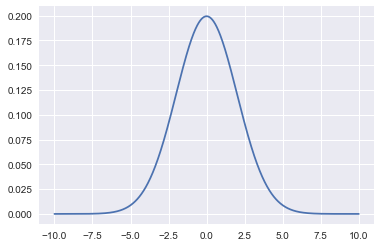

In [70]:
from scipy import stats
x = np.linspace(start=-10, stop=10, num=1000)
y = stats.norm.pdf(x, loc=0, scale=2)
plt.plot(x,y)

In [ ]:
num_classes = 2
import numpy as np # Biblioteca para Algebra Linear

In [ ]:
# random shuffle the data points
np.random.shuffle(y_true.T)

# Definening V as a latent variable denoting the classes. V is set to random initially.
v = np.array([random.randint(1, NClasses+1) for i in range(y.shape[0])])

#### 2. A partir do modelo obtido, explique como o algoritmo pode agrupar as amostras. É parte da solução explicar como você vai classificar cada amostra $x_i$ a partir do modelo obtido. Os agrupamentos obtidos fazem algum sentido?

## Questão 6
O objetivo desta questão é encontrar um bom modelo para o $VO_{2max}$, usando todos os dados fornecidos. Neste caso, $x$ é multidimensional (idade, peso e carga e $VO_{2max}$). Nesta questão você é livre para escolher um modelo, dentre os estudados no curso até o momento. Objetivo:
- Dado uma determinada idade, peso e carga, qual seria a distribuição de probabilidade do $VO_{2max}$ que o modelo fornece.

#### 1. Justifique, em poucas palavras a escolha do modelo, e indique os parêmetros do mesmo.

#### 2. Tente interpretar os resultados encontrados.

#### 3. Escolha duas faixas etárias, por exemplo entre $[30 - 40)$ e $[50 - 60)$ anos. Escolha 2 valores de $VO_{2max}$ possíveis para cada faixa. Você poderia calcular a probabilidade dos indivíduos em cada uma dessas faixas de idade. possuir o valor de $VO_{2max}$ escolhido, a partir do seu modelo? Justifique.

#### 4. Suponha um indivíduo com cujo $VO_{2max} = 32, 6 mL/kg.min$, carga de $181$ e cujo peso seja de $81,5 Kg$. A partir do modelo, obtenha as probabilidade do indivíduo ter entre $[40 - 50)$ anos, $(50 - 60)$ anos e $[60 - 70]$ anos.

## Questão 7
> O objetivo desta questão é verificar se é possível encontrar *clusters* de pontos com alguma interpretação que faça sentido. Use os dados de idade, carga e $VO_{2max}$ de todos os pacientes, e K-means para achar os *clusters*.

#### 1. Para $K = 3$: para cada um dos *clusters*, calcule a fração de pontos do cluster que estão associados a cada uma das seguintes faixas etárias: $[18 - 30)$, $[30 - 50)$, $[50 - 60)$, $[60 - 70)$, $[70 - 80)$, $[80 - 100)$. Por exemplo, para o caso trivial $K = 1$, $68/1172 = 0.0580$ dos pontos deste *cluster* único são associados a faixa $[18 - 30)$ e $445/1172 = 0.3797$ dos pontos estão associados à faixa $[30 - 50)$.

#### 2. Repita para Para $K = 4$.

#### 3. Tente perceber alguma interpretação para os *clusters* encontrados, se é que existe alguma.

#### 4. Comente os resultados.